# Advanced Features

4.1 Get Bounding Boxes

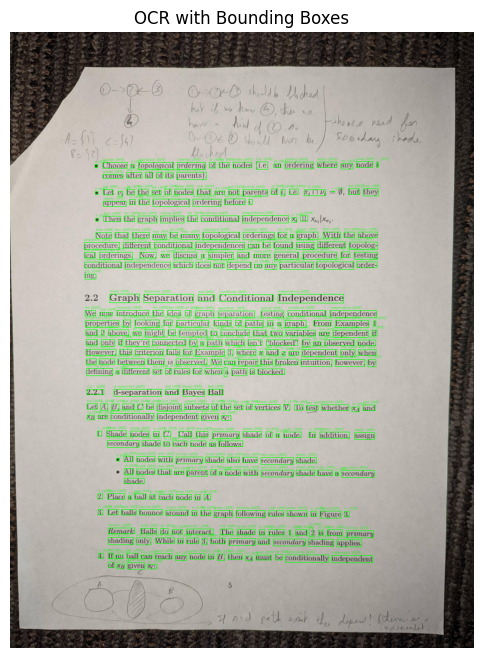


Detected Words:
e                    | Confidence: 90%
Choose               | Confidence: 94%
a                    | Confidence: 96%
topological          | Confidence: 96%
ordering             | Confidence: 96%
of                   | Confidence: 96%
the                  | Confidence: 96%
nodes                | Confidence: 96%
(i.e.                | Confidence: 94%
an                   | Confidence: 96%
ordering             | Confidence: 96%
where                | Confidence: 96%
any                  | Confidence: 96%
node                 | Confidence: 96%
7                    | Confidence: 76%
comes                | Confidence: 96%
after                | Confidence: 95%
all                  | Confidence: 96%
of                   | Confidence: 96%
its                  | Confidence: 96%
parents).            | Confidence: 96%
e                    | Confidence: 92%
Let                  | Confidence: 89%
v;                   | Confidence: 78%
be                   | Confidence: 96%
the     

In [4]:
import cv2
import pytesseract
import matplotlib.pyplot as plt
from pytesseract import Output

# Load image
img = cv2.imread('/Users/karansingh/ocr-learning/pytesseract/vlrYO.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Get bounding box data
data = pytesseract.image_to_data(gray, output_type=Output.DICT)

# data contains: 
# - 'text': detected text
# - 'conf': confidence score (0-100)
# - 'left', 'top', 'width', 'height': bounding box

# Draw bounding boxes
n_boxes = len(data['text'])
for i in range(n_boxes):
    # Only draw if confidence > 60 and text is not empty
    if int(data['conf'][i]) > 60 and data['text'][i]. strip():
        x = data['left'][i]
        y = data['top'][i]
        w = data['width'][i]
        h = data['height'][i]
        text = data['text'][i]
        conf = data['conf'][i]
        
        # Draw rectangle
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        
        # Put text with confidence
        label = f"{text} ({conf}%)"
        cv2.putText(img, label, (x, y - 10), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

# Display
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('OCR with Bounding Boxes')
plt.axis('off')
plt.show()

# Print detected words with confidence
print("\nDetected Words:")
print("="*50)
for i in range(n_boxes):
    if int(data['conf'][i]) > 60 and data['text'][i].strip():
        print(f"{data['text'][i]:<20} | Confidence: {data['conf'][i]}%")

4.2 Word-Level and Character-Level Detection

In [5]:
# Word-level bounding boxes
word_data = pytesseract.image_to_data(img, output_type=Output. DICT)

# Character-level bounding boxes
char_data = pytesseract.image_to_boxes(img)

print("Character Boxes:")
print(char_data)
# Format: character x_left y_bottom x_right y_top page

Character Boxes:
~ 0 0 2364 375 0
~ 0 375 650 399 0
~ 662 375 2364 399 0
~ 653 2456 997 2472 0
~ 969 2472 997 2495 0
~ 729 2416 771 2446 0
~ 744 2393 771 2416 0
g 662 2482 668 2491 0
p 673 2485 678 2491 0
o 681 2484 688 2492 0
l 691 2484 692 2495 0
o 694 2484 702 2492 0
g 704 2480 711 2492 0
i 713 2484 715 2496 0
c 717 2484 724 2492 0
a 726 2484 733 2492 0
l 736 2484 737 2495 0
e 748 2480 762 2497 0
e 765 2484 785 2495 0
s 787 2459 803 2497 0
g 431 2446 449 2481 0
e 451 2469 465 2486 0
C 469 2443 504 2495 0
h 485 2443 501 2495 0
o 514 2439 537 2505 0
o 553 2448 563 2464 0
o 503 2484 511 2492 0
s 513 2484 519 2492 0
e 521 2484 528 2492 0
— 539 2448 582 2497 0
\ 617 2474 624 2482 0
a 614 2444 658 2487 0
o 854 2484 861 2492 0
r 864 2484 869 2492 0
d 870 2484 877 2495 0
e 879 2484 886 2492 0
r 883 2480 892 2496 0
i 889 2484 897 2496 0
n 899 2484 906 2492 0
g 908 2480 915 2492 0
( 926 2480 931 2497 0
9 933 2484 940 2495 0
6 943 2484 951 2495 0
% 950 2480 959 2497 0
) 953 2480 969 2497 0
1 5

# 5. Page Segmentation Modes (PSM)
* Very Important! Different layouts need different modes.

In [7]:
"""
PSM (Page Segmentation Mode) Options:

0  = Orientation and script detection (OSD) only
1  = Automatic page segmentation with OSD
2  = Automatic page segmentation, no OSD (default)
3  = Fully automatic page segmentation, no OSD
4  = Assume a single column of text
5  = Assume a single uniform block of vertically aligned text
6  = Assume a single uniform block of text (DEFAULT)
7  = Treat the image as a single text line
8  = Treat the image as a single word
9  = Treat the image as a single word in a circle
10 = Treat the image as a single character
11 = Sparse text. Find as much text as possible
12 = Sparse text with OSD
13 = Raw line. Treat image as single text line, bypass hacks
"""

# Example usage
import pytesseract

img = cv2.imread('/Users/karansingh/ocr-learning/pytesseract/vlrYO.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Default (block of text)
text_default = pytesseract.image_to_string(gray)

# Single line of text
text_line = pytesseract.image_to_string(gray, config='--psm 7')

# Single word
text_word = pytesseract.image_to_string(gray, config='--psm 8')

# Single character
text_char = pytesseract.image_to_string(gray, config='--psm 10')

# Sparse text (scattered text in image)
text_sparse = pytesseract.image_to_string(gray, config='--psm 11')

print("Default mode:", text_default)
print("Single line:", text_line)
print("Single word:", text_word)
print("Single char:", text_char)
print("Sparse:", text_sparse)

Default mode: e Choose a topological ordering of the nodes (i.e. an ordering where any node 7
comes after all of its parents).

e Let v; be the set of nodes that are not parents of 7, i.e. 714 = 0, but they
appear in the topological ordering before 2.

e Then the graph implies the conditional independence x; IL %,|x,,.

Note that there may be many topological orderings for a graph. With the above
procedure, different conditional independences can be found using different topolog-
ical orderings. Now, we discuss a simpler and more general procedure for testing
conditional independence which does not depend on any particular topological order-
ing.

2.2. Graph Separation and Conditional Independence

We now introduce the idea of graph separation: testing conditional independence
properties by looking for particular kinds of paths in a graph. From Examples 1
and 2 above, we might be tempted to conclude that two variables are dependent if
and only if they’re connected by a path which isn’t

# 6. Language Support

In [8]:
# Check available languages
print("Available languages:")
print(pytesseract.get_languages())

# English (default)
text_en = pytesseract.image_to_string(img, lang='eng')

# Hindi
text_hi = pytesseract.image_to_string(img, lang='hin')

# Multiple languages
text_multi = pytesseract.image_to_string(img, lang='eng+hin')

# Download additional languages: 
# https://github.com/tesseract-ocr/tessdata
# Place . traineddata files in:  
# Windows: C:\Program Files\Tesseract-OCR\tessdata
# Linux:  /usr/share/tesseract-ocr/4.00/tessdata

Available languages:
['eng', 'osd', 'snum']


TesseractError: (1, 'Error opening data file /opt/homebrew/share/tessdata/hin.traineddata Please make sure the TESSDATA_PREFIX environment variable is set to your "tessdata" directory. Failed loading language \'hin\' Tesseract couldn\'t load any languages! Could not initialize tesseract.')

# 7. Custom Configuration

In [9]:
# Combine multiple config options
custom_config = r'--oem 3 --psm 6 -c tessedit_char_whitelist=0123456789'

# OEM (OCR Engine Mode):
# 0 = Legacy engine only
# 1 = Neural nets LSTM engine only
# 2 = Legacy + LSTM engines
# 3 = Default (based on what's available)

# Whitelist: Only recognize specific characters
text = pytesseract.image_to_string(img, config=custom_config)

# Useful configurations: 
# Only digits
config_digits = r'--psm 7 -c tessedit_char_whitelist=0123456789'

# Only uppercase letters
config_uppercase = r'--psm 7 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ'

# Only alphanumeric
config_alnum = r'--psm 7 -c tessedit_char_whitelist=0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz'